# Importing Modules and Data

Data Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [ ]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

Fetching Of Data

In [ ]:
error_data = pd.read_csv("/content/drive/MyDrive/GroupProject/PdM_errors.csv")
failure_data = pd.read_csv("/content/drive/MyDrive/GroupProject/PdM_failures.csv")
machines_data = pd.read_csv("/content/drive/MyDrive/GroupProject/PdM_machines.csv")
maint_data = pd.read_csv("/content/drive/MyDrive/GroupProject/PdM_maint.csv")
telemetry_data = pd.read_csv("/content/drive/MyDrive/GroupProject/PdM_telemetry.csv")


#Checking the Data

In [ ]:
error_data.isnull().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [ ]:
error_data.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
failure_data.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
machines_data.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
maint_data.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
telemetry_data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


Getting to know Error Data

In [ ]:
error_data.columns # the following are the columns in this dataset

Index(['datetime', 'machineID', 'errorID'], dtype='object')

In [ ]:
error_data.size  # oh so this the size of the data

11757

In [ ]:
error_data.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
error_data.errorID.values

array(['error1', 'error3', 'error5', ..., 'error2', 'error3', 'error3'],
      dtype=object)

In [ ]:
(error_data["errorID"].value_counts()) #So error1 is occuring highest

error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

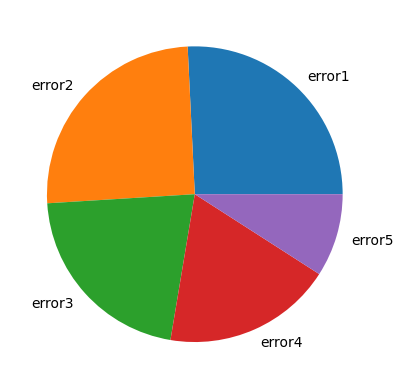

In [ ]:
plt.pie(error_data["errorID"].value_counts(),labels = ["error1","error2","error3","error4","error5"]) 
# visual representation of the persent occupied by each error
plt.show()

Makking the data more computable

In [ ]:
#error_data["datetime"].split(" ")
error_data[['date', 'time']] = error_data.datetime.str.split(" ", expand = True) #expanding the datetime

In [ ]:
error_data = error_data.drop(["datetime"],axis =1)

In [ ]:
error_data.head()

,machineID,errorID,date,time
0,1,error1,2015-01-03,07:00:00
1,1,error3,2015-01-03,20:00:00
2,1,error5,2015-01-04,06:00:00
3,1,error4,2015-01-10,15:00:00
4,1,error4,2015-01-22,10:00:00


In [ ]:
error_data[['date_year','date_month','date_day']] = error_data.date.str.split("-", expand = True) #further expanding

In [ ]:
error_data = error_data.drop(["date"],axis =1)

<Axes: ylabel='time'>

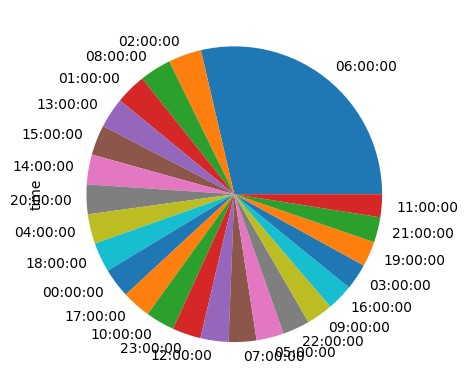

In [ ]:
error_data["time"].value_counts().plot(kind='pie')  #so here we can see the 6:00 is having highest values of error occuring

In [ ]:
error_data.head()   #Final view of the data

,machineID,errorID,time,date_year,date_month,date_day
0,1,error1,07:00:00,2015,01,03
1,1,error3,20:00:00,2015,01,03
2,1,error5,06:00:00,2015,01,04
3,1,error4,15:00:00,2015,01,10
4,1,error4,10:00:00,2015,01,22


The Following code will help us understand that the error data has almost all the entries of 2015 and only 2 entry of 2016

<Axes: ylabel='date_year'>

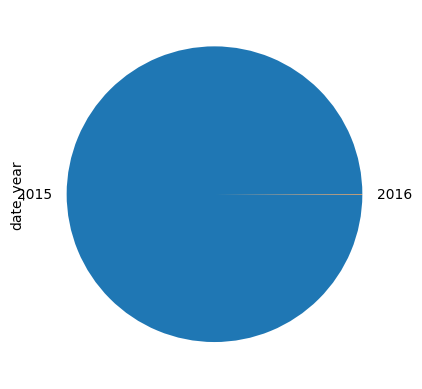

In [ ]:
(error_data["date_year"].value_counts()).plot(kind='pie')


The Following code will help us understand on which day of the month does the error's occurred

In [ ]:
error_data.columns  # the following are the columns in this dataset

Index(['machineID', 'errorID', 'time', 'date_year', 'date_month', 'date_day'], dtype='object')

In [ ]:
temp = error_data[["date_month","errorID"]]
temp = (temp.value_counts())

In [ ]:
temp    # oh so this the error count grouped by month

date_month  errorID
10          error2     99
08          error2     98
01          error1     96
03          error1     95
08          error1     94
02          error1     89
09          error1     89
12          error2     87
05          error2     87
07          error2     86
10          error3     84
04          error1     83
06          error1     83
03          error2     83
04          error3     83
10          error1     82
01          error2     81
            error3     79
05          error1     78
09          error2     77
03          error3     77
11          error2     77
12          error1     76
06          error2     76
04          error2     75
11          error1     75
06          error3     71
07          error1     70
01          error4     69
12          error4     68
10          error4     68
08          error3     68
            error4     68
03          error4     67
12          error3     67
05          error3     65
11          error4     64
            error3


The Following code will help us understand that the error occured in the day

<Axes: ylabel='date_month'>

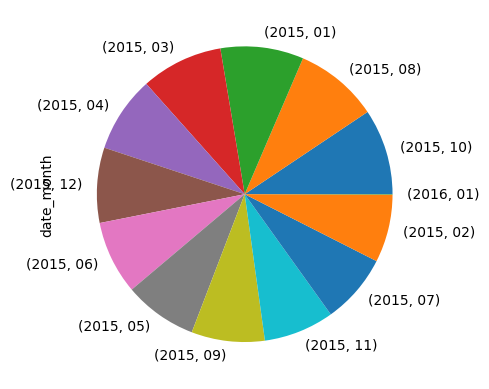

In [ ]:
error_data.groupby('date_year')['date_month'].value_counts().plot(kind='pie')  #lets see what is the frequency of the days in the data

_____________________________________________________________________________

#Checking failure data set

In [ ]:
failure_data.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Formating the date and time column

In [ ]:
failure_data.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
failure_data.columns  # the following are the columns in this dataset

Index(['datetime', 'machineID', 'failure'], dtype='object')

In [ ]:
failure_data[['date', 'time']] = failure_data.datetime.str.split(" ", expand = True)
failure_data = failure_data.drop(["datetime"],axis =1)
failure_data.head()
# Expanding the date and time columns

,machineID,failure,date,time
0,1,comp4,2015-01-05,06:00:00
1,1,comp1,2015-03-06,06:00:00
2,1,comp2,2015-04-20,06:00:00
3,1,comp4,2015-06-19,06:00:00
4,1,comp4,2015-09-02,06:00:00


In [ ]:
failure_data[['date_year','date_month','date_day']] = failure_data.date.str.split("-", expand = True)
failure_data = failure_data.drop(["date"],axis =1)
failure_data.head()

,machineID,failure,time,date_year,date_month,date_day
0,1,comp4,06:00:00,2015,01,05
1,1,comp1,06:00:00,2015,03,06
2,1,comp2,06:00:00,2015,04,20
3,1,comp4,06:00:00,2015,06,19
4,1,comp4,06:00:00,2015,09,02


Showcasing how many times a component have failed

In [ ]:
failure_data["failure"].value_counts()    ## oh so comp2 fail's a lot

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

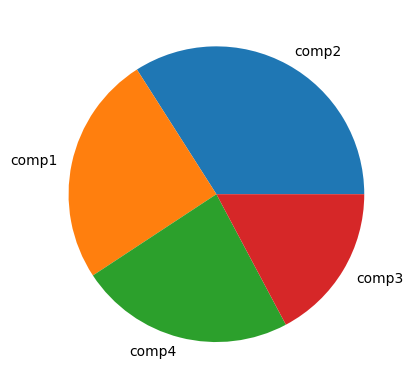

In [ ]:
plt.pie(failure_data["failure"].value_counts(),labels = ["comp2","comp1","comp4","comp3"])
plt.show()
#visualization of components failed based on there contribution

Seeing the year of the failure.

Here we can see that the data is only of 2015 

<Axes: ylabel='date_year'>

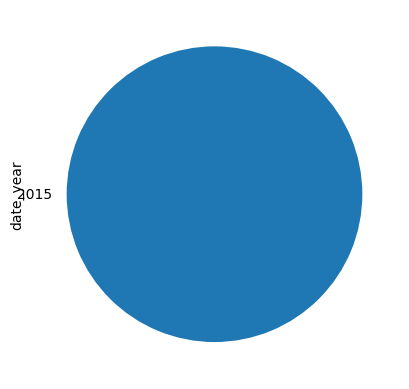

In [ ]:
(failure_data["date_year"].value_counts()).plot(kind='pie')

<Axes: ylabel='date_month'>

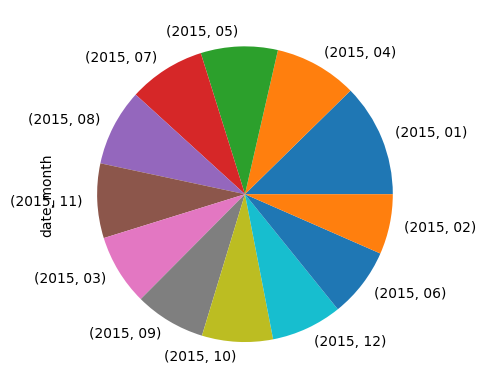

In [ ]:
#(failure_data["date_month"].value_counts()) # the following data grouped by month to see which month has how much contribution to the data
failure_data.groupby('date_year')['date_month'].value_counts().plot(kind='pie')

<Axes: ylabel='date_day'>

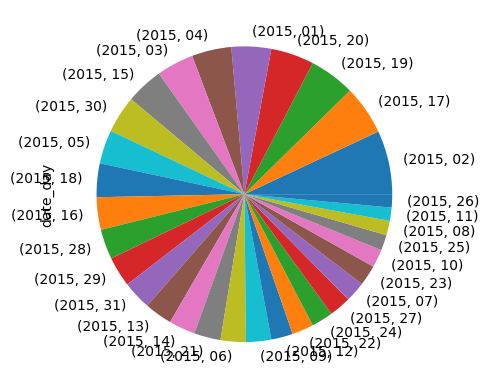

In [ ]:
failure_data.groupby('date_year')['date_day'].value_counts().plot(kind='pie')   # the following data grouped by day to see which day has how much contribution to the data

Here we can see that the time of the failure is either 06:00:00 or 03:00:00

And in this also we have 06:00:00 having maximum failure

In [ ]:
(failure_data["time"].value_counts())

06:00:00    743
03:00:00     18
Name: time, dtype: int64

______________________________________________________________________________

#Checking The Machines data

In [ ]:
machines_data.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


Now lets see how many modeles we have and at what quantity

In [ ]:
machines_data["model"].value_counts()   #here we can see that the model3 have hightest contribution in the data

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

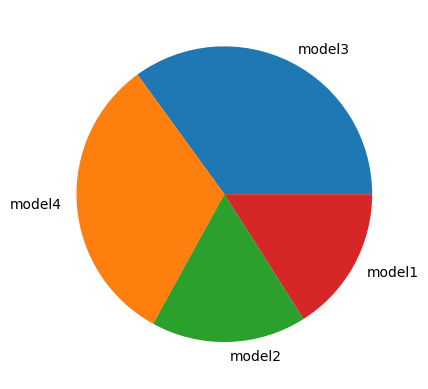

In [ ]:
plt.pie(machines_data["model"].value_counts(),labels = ["model3","model4","model2","model1"])
plt.show()
#visualixing the contribution of the model in the data

Here we can see what is the oldest machine in the company

In [ ]:
max(machines_data['age'])    #Lets see what is the maximum age of the machines present in data

20

Here we can see what is the newest machine in the company 

In [ ]:
min(machines_data['age']) # machine id 39 is having the minimum age hmm prety new 

0

In [ ]:
sum(machines_data['age'])/100   #average of how old a machine is given

11.33

_____________________________________________________________________________

#Checking Maint data

In [ ]:
maint_data.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Formating the datetime

In [ ]:
maint_data[['date', 'time']] = maint_data.datetime.str.split(" ", expand = True)
maint_data = maint_data.drop(["datetime"],axis =1)
maint_data.head()         #spliting the date and time

,machineID,comp,date,time
0,1,comp2,2014-06-01,06:00:00
1,1,comp4,2014-07-16,06:00:00
2,1,comp3,2014-07-31,06:00:00
3,1,comp1,2014-12-13,06:00:00
4,1,comp4,2015-01-05,06:00:00


In [ ]:
maint_data[['date_year','date_month','date_day']] = maint_data.date.str.split("-", expand = True)
maint_data = maint_data.drop(["date"],axis =1)
maint_data.head()
# spliting based on day year and month

,machineID,comp,time,date_year,date_month,date_day
0,1,comp2,06:00:00,2014,06,01
1,1,comp4,06:00:00,2014,07,16
2,1,comp3,06:00:00,2014,07,31
3,1,comp1,06:00:00,2014,12,13
4,1,comp4,06:00:00,2015,01,05


In [ ]:
maint_data["time"].value_counts()     # so all the data is recorded on 6:00

06:00:00    3286
Name: time, dtype: int64

Here we can See that the time of the maintainence of all the machine is at 06:00:00 

So we will drop it

In [ ]:
maint_data = maint_data.drop(["time"],axis =1)  #so lets drop it

In [ ]:
maint_data.head()     #view of the data after droping 

,machineID,comp,date_year,date_month,date_day
0,1,comp2,2014,06,01
1,1,comp4,2014,07,16
2,1,comp3,2014,07,31
3,1,comp1,2014,12,13
4,1,comp4,2015,01,05


Here we can see that there is records of 2015,2014,2016

In [ ]:
maint_data["date_year"].value_counts()

2015    2879
2014     400
2016       7
Name: date_year, dtype: int64

<Axes: ylabel='date_month'>

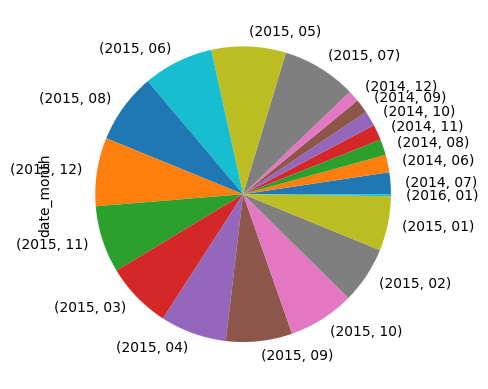

In [ ]:
maint_data.groupby('date_year')['date_month'].value_counts().plot(kind='pie')       # the following data grouped by month to see which month has how much contribution to the data

<Axes: ylabel='date_day'>

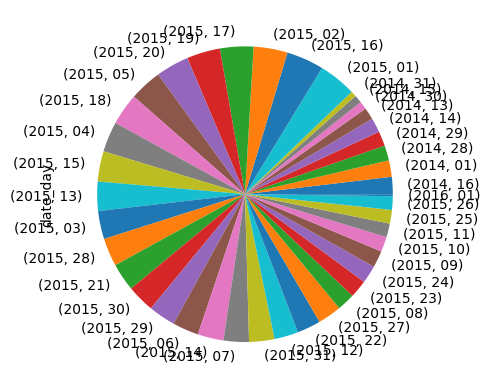

In [ ]:
maint_data.groupby('date_year')['date_day'].value_counts().plot(kind='pie')           # the following data grouped by day to see which day has how much contribution to the data

____________________________________________________________________________

#Checking the telemetry data

In [ ]:
telemetry_data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
telemetry_data["machineID"].value_counts()       # so we can see we have same amount of data for each machine id

1      8761
64     8761
74     8761
73     8761
72     8761
       ... 
31     8761
30     8761
29     8761
28     8761
100    8761
Name: machineID, Length: 100, dtype: int64

Formating The Data for datetime

In [ ]:
telemetry_data[['date', 'time']] = telemetry_data.datetime.str.split(" ", expand = True)
telemetry_data = telemetry_data.drop(["datetime"],axis =1)
telemetry_data[['date_year','date_month','date_day']] = telemetry_data.date.str.split("-", expand = True)
telemetry_data = telemetry_data.drop(["date"],axis =1)
telemetry_data.head()
# spliting the data

,machineID,volt,rotate,pressure,vibration,time,date_year,date_month,date_day
0,1,176.217853,418.504078,113.077935,45.087686,06:00:00,2015,01,01
1,1,162.879223,402.747490,95.460525,43.413973,07:00:00,2015,01,01
2,1,170.989902,527.349825,75.237905,34.178847,08:00:00,2015,01,01
3,1,162.462833,346.149335,109.248561,41.122144,09:00:00,2015,01,01
4,1,157.610021,435.376873,111.886648,25.990511,10:00:00,2015,01,01


Looking at the statistic of The data

In [ ]:
telemetry_data.describe() #ignore machine Id 
#Lets see all the statistic val for numerical data

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [ ]:
#sns.pairplot(data=telemetry_data)  #takes 1m 28s #cant apperehend much from this

Here we can see that the data has data of 2015 and 2016

In [ ]:
telemetry_data["date_year"].value_counts()

2015    875400
2016       700
Name: date_year, dtype: int64

<Axes: ylabel='date_month'>

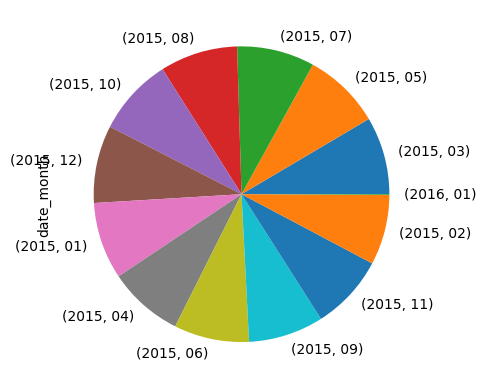

In [ ]:
               # so here we have almost same amount of data based on month except month 2
telemetry_data.groupby('date_year')['date_month'].value_counts().plot(kind='pie')

<Axes: ylabel='date_day'>

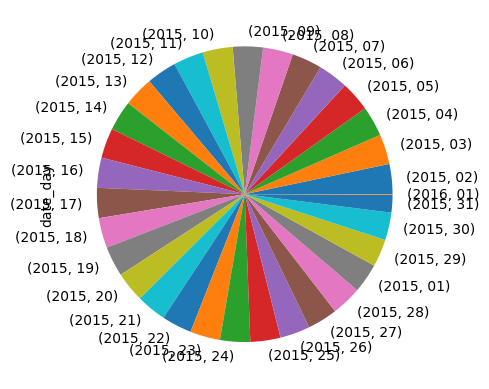

In [ ]:
#(telemetry_data["date_day"].value_counts())  
telemetry_data.groupby('date_year')['date_day'].value_counts().plot(kind='pie')         # so here we have almost same amount of data based on day except days 29,30,31

__________________________________________________________________________________________________

#Creating a mereged dataframe

In [ ]:
telemetry_data.columns    # the following are the columns in this dataset

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'time',
       'date_year', 'date_month', 'date_day'],
      dtype='object')

In [ ]:
error_data.columns      # the following are the columns in this dataset

Index(['machineID', 'errorID', 'time', 'date_year', 'date_month', 'date_day'], dtype='object')

In [ ]:
maint_data.columns      # the following are the columns in this dataset

Index(['machineID', 'comp', 'date_year', 'date_month', 'date_day'], dtype='object')

In [ ]:
failure_data.columns

Index(['machineID', 'failure', 'time', 'date_year', 'date_month', 'date_day'], dtype='object')

In [ ]:
machines_data.columns       # the following are the columns in this dataset

Index(['machineID', 'model', 'age'], dtype='object')

In [ ]:
# Was viewing the columns so that i can get better undestanding for merging the data

In [ ]:
#base_data = pd.DataFrame()
base_data = telemetry_data.merge(error_data,how='left',on=['date_year','date_month','date_day','time','machineID']).merge(maint_data,how='left',on=['date_year','date_month','date_day','machineID']).merge(failure_data,how='left',on=['date_year','date_month','date_day','time','machineID']).merge(machines_data,how='left',on=['machineID'])

In [ ]:
# merged all the dataframes into one master dataframe named as base_data

In [ ]:
base_data.head()      #viewing the master data

,machineID,volt,rotate,pressure,vibration,time,date_year,date_month,date_day,errorID,comp,failure,model,age
0,1,176.217853,418.504078,113.077935,45.087686,06:00:00,2015,01,01,NaN,NaN,NaN,model3,18
1,1,162.879223,402.747490,95.460525,43.413973,07:00:00,2015,01,01,NaN,NaN,NaN,model3,18
2,1,170.989902,527.349825,75.237905,34.178847,08:00:00,2015,01,01,NaN,NaN,NaN,model3,18
3,1,162.462833,346.149335,109.248561,41.122144,09:00:00,2015,01,01,NaN,NaN,NaN,model3,18
4,1,157.610021,435.376873,111.886648,25.990511,10:00:00,2015,01,01,NaN,NaN,NaN,model3,18


#Dealing with null values

In [ ]:
base_data.isnull().sum()          # checking for null values in master data

machineID          0
volt               0
rotate             0
pressure           0
vibration          0
time               0
date_year          0
date_month         0
date_day           0
errorID       889850
comp          824653
failure       892703
model              0
age                0
dtype: int64

In [ ]:
# Oh no !   error_id,comp,failure has lot of empty values

In [ ]:
base_data['machineID'].value_counts()     #cheking the amount of data based on machine id 
''' But lets see when we have checked the data based on machine id 
on various dataframes before merging we had seen that the data was equally distributed but after merging the distribution chaned  
Look's like central theory limit deoesnt got applied here which state's
  "The central limit theorem (CLT) states that the distribution of 
  sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.
  Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold."
Oh on second thought we have a bit of data where a comp have more failure and a comp have less failure on that bases we have merged the data 
so due to that this might occur.
'''

' But lets see when we have checked the data based on machine id \non various dataframes before merging we had seen that the data was equally distributed but after merging the distribution chaned  \nLook\'s like central theory limit deoesnt got applied here which state\'s\n  "The central limit theorem (CLT) states that the distribution of \n  sample means approximates a normal distribution as the sample size gets larger, regardless of the population\'s distribution.\n  Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold."\nOh on second thought we have a bit of data where a comp have more failure and a comp have less failure on that bases we have merged the data \nso due to that this might occur.\n'

<Axes: ylabel='time'>

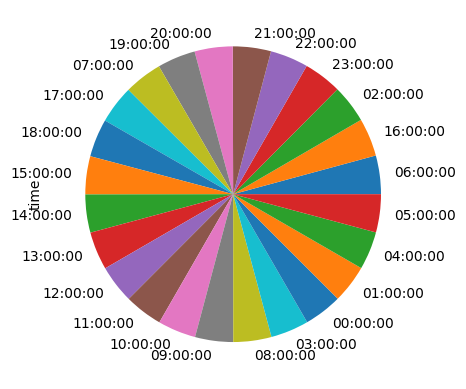

In [ ]:
base_data['time'].value_counts().plot(kind="pie")

In [ ]:
base_data[['time_hour','dump','dump2']] = base_data.time.str.split(":", expand = True)    #expanding the time to hour min sec

In [ ]:
base_data.head()      #viewing after spliting

,machineID,volt,rotate,pressure,vibration,time,date_year,date_month,date_day,errorID,comp,failure,model,age,time_hour,dump,dump2
0,1,176.217853,418.504078,113.077935,45.087686,06:00:00,2015,01,01,NaN,NaN,NaN,model3,18,06,00,00
1,1,162.879223,402.747490,95.460525,43.413973,07:00:00,2015,01,01,NaN,NaN,NaN,model3,18,07,00,00
2,1,170.989902,527.349825,75.237905,34.178847,08:00:00,2015,01,01,NaN,NaN,NaN,model3,18,08,00,00
3,1,162.462833,346.149335,109.248561,41.122144,09:00:00,2015,01,01,NaN,NaN,NaN,model3,18,09,00,00
4,1,157.610021,435.376873,111.886648,25.990511,10:00:00,2015,01,01,NaN,NaN,NaN,model3,18,10,00,00


In [ ]:
base_data.columns     ## the following are the columns in this dataset

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'time',
       'date_year', 'date_month', 'date_day', 'errorID', 'comp', 'failure',
       'model', 'age', 'time_hour', 'dump', 'dump2'],
      dtype='object')

In [ ]:
# we have see that the sec and min doesnt matter  as there are 0 and 0

In [ ]:
# so lets drop them

In [ ]:
base_data.drop(base_data.columns[-1],axis=1,inplace=True)
base_data.drop(base_data.columns[-1],axis=1,inplace=True)

In [ ]:
# now lets drop the col on which the orignal split had occured

In [ ]:
base_data.drop(base_data.columns[5],axis=1,inplace=True)

In [ ]:
base_data.head()

,machineID,volt,rotate,pressure,vibration,date_year,date_month,date_day,errorID,comp,failure,model,age,time_hour
0,1,176.217853,418.504078,113.077935,45.087686,2015,01,01,NaN,NaN,NaN,model3,18,06
1,1,162.879223,402.747490,95.460525,43.413973,2015,01,01,NaN,NaN,NaN,model3,18,07
2,1,170.989902,527.349825,75.237905,34.178847,2015,01,01,NaN,NaN,NaN,model3,18,08
3,1,162.462833,346.149335,109.248561,41.122144,2015,01,01,NaN,NaN,NaN,model3,18,09
4,1,157.610021,435.376873,111.886648,25.990511,2015,01,01,NaN,NaN,NaN,model3,18,10


In [ ]:
base_data.isnull().sum()          # now lets handle the missing value

machineID          0
volt               0
rotate             0
pressure           0
vibration          0
date_year          0
date_month         0
date_day           0
errorID       889850
comp          824653
failure       892703
model              0
age                0
time_hour          0
dtype: int64

In [ ]:
#1123 --> failure        This much are the value of the failure ocuring to less 
#0.125639666 %  calculated persentage failure occuring based on the whole data

In [ ]:
# stratergy disused with the team and came to conclusion that we will 
# drop comp and errId and will only focus on failure
# and in failure we will lable the failure occurence as 1 else 0

In [ ]:
base_data.drop(['comp','errorID'],axis=1,inplace=True)

In [ ]:
base_data['failure'].loc[~base_data['failure'].isnull()] = 1  # nan
base_data['failure'].loc[base_data['failure'].isnull()] = 0 

In [ ]:
base_data.isnull().sum()         #so the null values are gone

machineID     0
volt          0
rotate        0
pressure      0
vibration     0
date_year     0
date_month    0
date_day      0
failure       0
model         0
age           0
time_hour     0
dtype: int64

#Data Redefineing

In [ ]:
base_data.dtypes    #lets check the data types are in order or not

machineID       int64
volt          float64
rotate        float64
pressure      float64
vibration     float64
date_year      object
date_month     object
date_day       object
failure        object
model          object
age             int64
time_hour      object
dtype: object

In [ ]:
base_data[['date_year','date_month','date_day','failure','time_hour']]= base_data[['date_year','date_month','date_day','failure','time_hour']].astype(int)

In [ ]:
#the above values are not in order so we have changed its data type back to orignal

In [ ]:
base_data.dtypes

machineID       int64
volt          float64
rotate        float64
pressure      float64
vibration     float64
date_year       int64
date_month      int64
date_day        int64
failure         int64
model          object
age             int64
time_hour       int64
dtype: object

In [ ]:
base_data.corr()['failure']               # checking the coo varience to see if the data is related to failure or not and how  strong #heat map

machineID     0.001123
volt          0.011183
rotate       -0.017677
pressure      0.015530
vibration     0.018367
date_year    -0.000993
date_month   -0.001826
date_day     -0.001043
failure       1.000000
age           0.007175
time_hour    -0.028429
Name: failure, dtype: float64

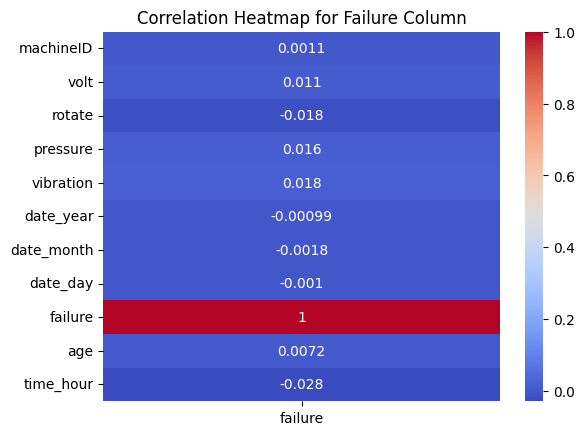

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(base_data.corr()['failure'].to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Failure Column')
plt.show()  

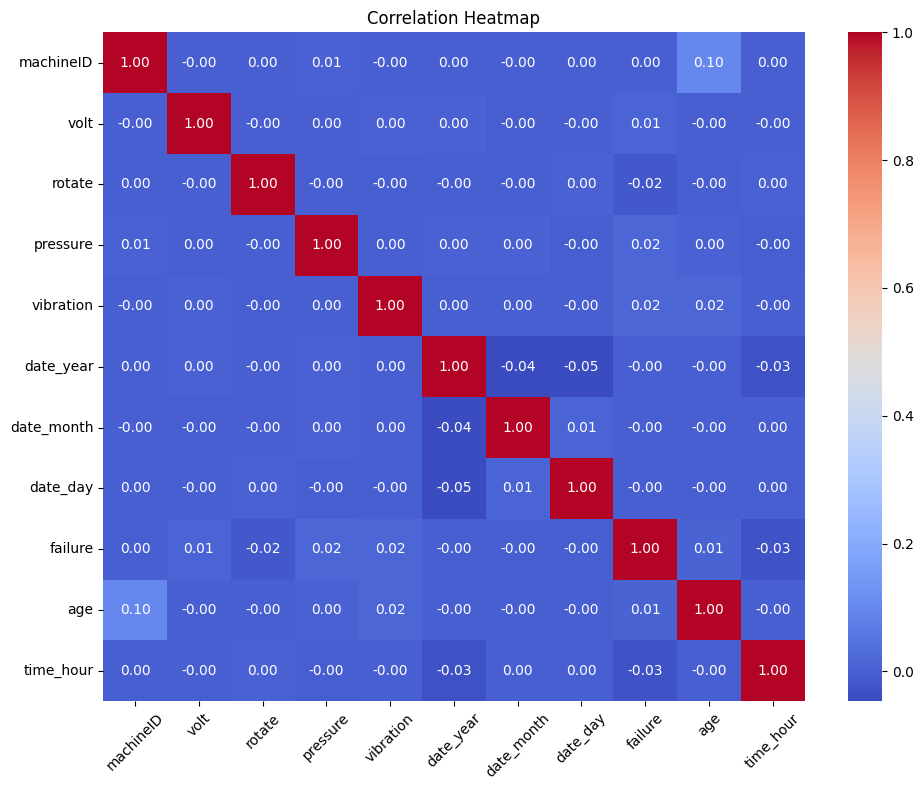

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  
sns.heatmap(base_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})  
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()  

In [ ]:
# we have see that the co var is low 
# and in that machine id,volt,presure ,vibration , age are positively co related
#where as time hour, date_day , date month , date,year and rotate are negetaively co related 

______

In [ ]:
base_data.head()    # looking the data

,machineID,volt,rotate,pressure,vibration,date_year,date_month,date_day,failure,model,age,time_hour
0,1,176.217853,418.504078,113.077935,45.087686,2015,1,1,0,model3,18,6
1,1,162.879223,402.747490,95.460525,43.413973,2015,1,1,0,model3,18,7
2,1,170.989902,527.349825,75.237905,34.178847,2015,1,1,0,model3,18,8
3,1,162.462833,346.149335,109.248561,41.122144,2015,1,1,0,model3,18,9
4,1,157.610021,435.376873,111.886648,25.990511,2015,1,1,0,model3,18,10


#Pre prosesing the data

In [ ]:
catdf = base_data.select_dtypes([object]).copy()        # making a copy of all object data type columns

In [ ]:
base_data.drop(base_data.select_dtypes([object]).columns,axis=1,inplace=True)       #droped the catagori values form master data

In [ ]:
base_data[pd.get_dummies(catdf.select_dtypes([object])).columns] = pd.get_dummies(catdf.select_dtypes([object]))      #,drop_first= True   
# now adding the categorical dummy val  by using get dummies  #not applicable on dummy trap

In [ ]:
base_data.head()      # lets see how the data look's like #onehot on model #dummy trap See dummy

,machineID,volt,rotate,pressure,vibration,date_year,date_month,date_day,failure,age,time_hour,model_model1,model_model2,model_model3,model_model4
0,1,176.217853,418.504078,113.077935,45.087686,2015,1,1,0,18,6,0,0,1,0
1,1,162.879223,402.747490,95.460525,43.413973,2015,1,1,0,18,7,0,0,1,0
2,1,170.989902,527.349825,75.237905,34.178847,2015,1,1,0,18,8,0,0,1,0
3,1,162.462833,346.149335,109.248561,41.122144,2015,1,1,0,18,9,0,0,1,0
4,1,157.610021,435.376873,111.886648,25.990511,2015,1,1,0,18,10,0,0,1,0


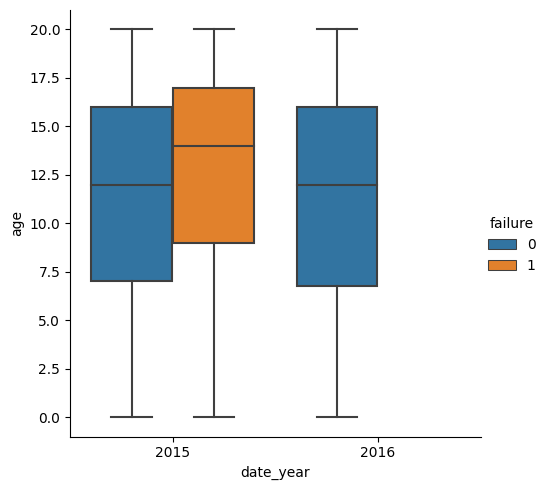

In [ ]:
sns.catplot(data=base_data ,x ='date_year',y ='age',hue='failure',kind='box')       #lets plot graph of failure and date_year 
# we can see that almost they have same inter quatile range

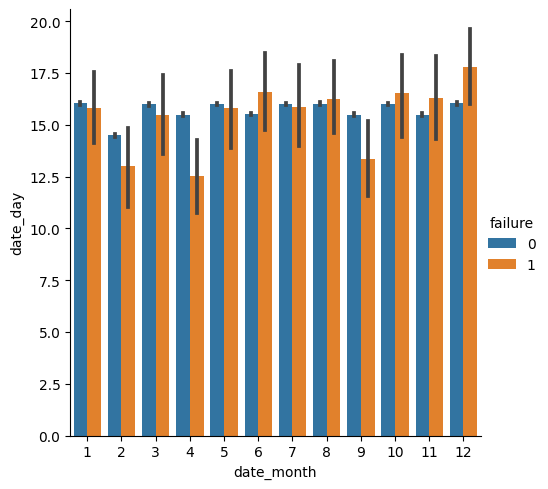

In [ ]:
sns.catplot(data=base_data ,x ='date_month',y ='date_day',hue='failure',kind='bar')
#lets plot how the failure do on the baises of month
# here we can see month 4 has lowest failure rate and month 12 has highest failure rate

In [ ]:
base_data.columns.drop("failure")

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'date_year',
       'date_month', 'date_day', 'age', 'time_hour', 'model_model1',
       'model_model2', 'model_model3', 'model_model4'],
      dtype='object')

In [ ]:
# applied min max scaleing so that all our data gets scaled in the range between min and max value

In [ ]:
base_data.head()

,machineID,volt,rotate,pressure,vibration,date_year,date_month,date_day,failure,age,time_hour,model_model1,model_model2,model_model3,model_model4
0,1,176.217853,418.504078,113.077935,45.087686,2015,1,1,0,18,6,0,0,1,0
1,1,162.879223,402.747490,95.460525,43.413973,2015,1,1,0,18,7,0,0,1,0
2,1,170.989902,527.349825,75.237905,34.178847,2015,1,1,0,18,8,0,0,1,0
3,1,162.462833,346.149335,109.248561,41.122144,2015,1,1,0,18,9,0,0,1,0
4,1,157.610021,435.376873,111.886648,25.990511,2015,1,1,0,18,10,0,0,1,0


In [ ]:
base_data.columns

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'date_year',
       'date_month', 'date_day', 'failure', 'age', 'time_hour', 'model_model1',
       'model_model2', 'model_model3', 'model_model4'],
      dtype='object')

In [ ]:
base_data=shuffle(base_data,random_state=20)          #lets shuffle the data so that if failure is together we it will get seperated

In [ ]:
X = base_data.drop('failure',axis=1)
y = base_data['failure'] 

In [ ]:
#here we for X data which contains the input features of the dataset and  which contains the corresponding output label "failure" of the dataset.

#Balancing the data

In [ ]:
from imblearn.over_sampling import SMOTE        #smote should be applied before scaling

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.04)
X_sam, y_sam = sm.fit_resample(X, y)

print('After OverSampling, the shape of X: {}'.format(X_sam.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_sam.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_sam == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sam == 0)))

Before OverSampling, counts of label '1': 1123
Before OverSampling, counts of label '0': 892703 

After OverSampling, the shape of X: (928411, 14)
After OverSampling, the shape of y: (928411,) 

After OverSampling, counts of label '1': 35708
After OverSampling, counts of label '0': 892703


#Scaling and spilting the data for unsampled data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_text = mms.transform(X_test)

In [ ]:
##code performs train-test split on the dataset represented by the feature matrix 'X' and target vector 'y' ,
#and split data by 20 % in test data and 80% in train data

# Scaling and spliting for Sampled dataset

In [ ]:
X_train_sam,X_test_sam,Y_train_sam,Y_test_sam = train_test_split(X_sam,y_sam,test_size=0.2, random_state=0)

In [ ]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
from pickle import dump
dump(mms, open('MinMaxScaler.pkl','wb'))
X_text = mms.transform(X_test)

#Model Aplication

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay

In [ ]:
#we have implemented several classification algorithms, including Logistic Regression, Naive Bayes, Decision Tree Classifier, and SVM.
#While these algorithms produced good accuracy, the precision and recall metrics did not meet your expectations. 
#However, when we implemented the Random Forest Classifier, we obtained better results.

In [ ]:
X_train

array([[0.57575758, 0.33774435, 0.53716445, ..., 0.        , 0.        ,
        0.        ],
       [0.08080808, 0.37596176, 0.57704462, ..., 0.        , 0.        ,
        1.        ],
       [0.7979798 , 0.38798012, 0.51419789, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4040404 , 0.39116379, 0.62372566, ..., 0.        , 0.        ,
        1.        ],
       [0.22222222, 0.34285901, 0.45927191, ..., 0.        , 0.        ,
        0.        ],
       [0.98989899, 0.54427115, 0.45368012, ..., 0.        , 0.        ,
        0.        ]])

0.9987357774968394
              precision    recall  f1-score   support

 not failure       1.00      1.00      1.00    178540
     failure       0.00      0.00      0.00       226

    accuracy                           1.00    178766
   macro avg       0.50      0.50      0.50    178766
weighted avg       1.00      1.00      1.00    178766



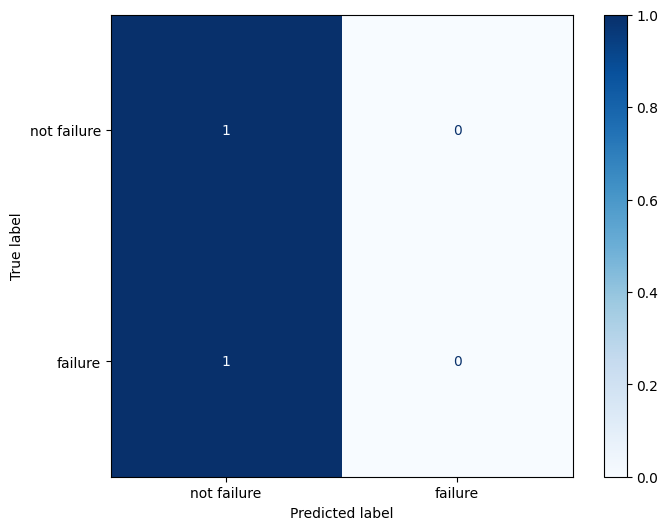

In [ ]:
#Random Forest MINMAX

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =53)
rfc.fit(X_train , Y_train)

prediction = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['not failure','failure']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


#As we implemented logistic Regression , naive bayes , DesicionTree Clasifier ,SVM,X_g Boost and all we got good accuracy but in recall and precision 
#we didn't get the expected output so in last we implemented Randomforest Classifer and got better result
# will add a detailed description in documentation 

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train,y_train)
y_pred =  model.predict(x_test)
model.score(x_test,y_test)

from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

# Model with sampling

accuracy 0.9994668332588336
              precision    recall  f1-score   support

 not failure       1.00      1.00      1.00    178635
     failure       1.00      0.99      0.99      7048

    accuracy                           1.00    185683
   macro avg       1.00      0.99      1.00    185683
weighted avg       1.00      1.00      1.00    185683



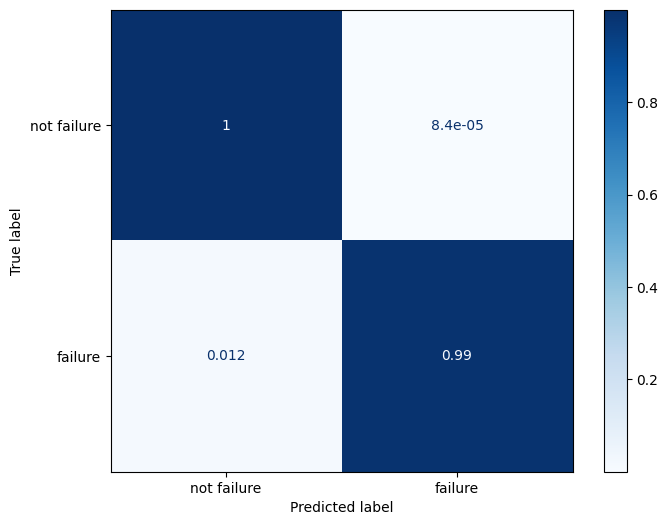

In [ ]:
#Random Forest MINMAX

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =53)
rfc.fit(X_train_sam , Y_train_sam)

prediction = rfc.predict(X_test_sam)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_sam , prediction)
print("accuracy",accuracy)

target_names = ['not failure','failure']
print(classification_report(Y_test_sam, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test_sam, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


#As we implemented logistic Regression , naive bayes , DesicionTree Clasifier ,SVM,X_g Boost and all we got good accuracy but in recall and precision 
#we didn't get the expected output so in last we implemented Randomforest Classifer and got better result
# will add a detailed description in documentation 

# Rough

In [ ]:
# l1 =[]
# for i in range(1,11):
#   l1.append(i)

In [ ]:
# l1 = [0.035,0.035625,0.03625,0.036875,0.0375]

In [ ]:
# list_result_with_sample = []

In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier

# for i in l1:
#   sm = SMOTE(sampling_strategy=i)
#   X_sam, y_sam = sm.fit_resample(X, y)
#   X_train_sam,X_test_sam,Y_train_sam,Y_test_sam = train_test_split(X_sam,y_sam,test_size=0.2, random_state=0)
#   mms = MinMaxScaler()
#   X_train = mms.fit_transform(X_train)
#   X_text = mms.transform(X_test)
#   rfc = RandomForestClassifier(n_estimators =53)
#   rfc.fit(X_train_sam , Y_train_sam)

#   prediction = rfc.predict(X_test_sam)

#   accuracy = accuracy_score(Y_test_sam , prediction)
#   target_names = ['not failure','failure']
#   list_result_with_sample.append([classification_report(Y_test_sam, prediction.reshape(-1,1), target_names=target_names),accuracy])

In [ ]:
# file = open('result_from_0.035to0.0375.txt','w')
# for i,t in enumerate(l1):
# 	#print(i,t)
#   file.write("For "+str(t) +"\n" + list_result_with_sample[i][0] + "\n")
# file.close()

#Demployment Support code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from joblib import dump

In [ ]:
dump(rfc, 'random_forest.joblib')

['random_forest.joblib']

____________________________________For Deployment _____________________________

In [ ]:
machineID = 1
volt=0.1
rotate=0
pressure=0
vibration=0 
date_year=0
date_month=0 
date_day=0 
age=0
time_hour=0
model_model1=0
model_model2=0
model_model3=0
model_model4=0

In [ ]:
dw = pd.DataFrame({
        'machineID': [machineID],
        'volt': [volt],
        'rotate': [rotate],
        'pressure': [pressure],
        'vibration': [vibration],
        'date_year': [date_year],
        'date_month': [date_month],
        'date_day': [date_day],
        'age': [age],
        'time_hour': [time_hour],
        'model_model1': [model_model1],
        'model_model2': [model_model2],
        'model_model3': [model_model3],
        'model_model4': [model_model4],
    })

In [ ]:
dw.columns[0]

'machineID'

In [ ]:
l1 = ['machineID',
        'volt',
        'rotate',
        'pressure',
        'vibration',
        'date_year',
        'date_month',
        'date_day',
        'age',
        'time_hour']

count2 = 0
lnif = []

for i in l1:
  if dw[i].dtypes not in [int,float]:
    lnif.append(i)
    count2 =1

if count2==1:
  try:
    for i in lnif: 
      dw[i].astype(float)
  except ValueError as error:
    print(str(error),"in exception")
#dw['machineID'].astype(int)

In [ ]:
#print(dw.all(axis=0))
val_count =0
x = dw.columns
for i in range(len(x)):
  if dw[x[i]].values[0] != 0:
    val_count=1
  print(val_count)


if val_count>0:
  print("in loo")
  pass
else :
  print("out loo")
  pass

1
1
1
1
1
1
1
1
1
1
1
1
1
1
in loo


In [ ]:
dw = pd.DataFrame(columns=['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'date_year',
    'date_month', 'date_day', 'age', 'time_hour', 'model_model1',
    'model_model2', 'model_model3', 'model_model4'])

In [ ]:
new_row = pd.Series([machineID, volt, rotate, pressure, vibration, date_year,
    date_month, date_day, age, time_hour, model_model1,
    model_model2, model_model3, model_model4], index=dw.columns)

In [ ]:
dw = pd.concat([dw, new_row.to_frame().T], ignore_index=True)

In [ ]:
dw

,machineID,volt,rotate,pressure,vibration,date_year,date_month,date_day,age,time_hour,model_model1,model_model2,model_model3,model_model4
0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col_in_scale= ['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'date_year',
       'date_month', 'date_day', 'failure', 'age', 'time_hour', 'model_model1',
       'model_model2', 'model_model3', 'model_model4']

In [ ]:
import pickle
with open('/content/MinMaxScaler.pkl', 'rb') as file:
    mms = pickle.load(file)
dw = mms.fit_transform(dw)